<a href="https://colab.research.google.com/github/samyzaf/kerutils/blob/master/poker2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Poker Hand Image Recognition**

<img src="https://samyzaf.com/ML/poker2/images/fig1.png" width="70%" />

* Poker hand images database created by [Samy Zafrany](https://samyzaf.com)
* It consists of 49,759 192x192 pixels rgb color images.
* It is divided to two **HDF5** datasets:
  1. train.h5, which consists of 40,000 training samples
  2. test.h5, which consists of 9,759 validation samples

  These datasets can be dowloaded from:
  1. http://www.samyzaf.com/ML/poker2/train.h5
  2. http://www.samyzaf.com/ML/poker2/test.h5
  
* The poker hand images in these datasets are based on a larger
  numerical database of poker hands
  (consisting of 1,025,010 instances of poker hands)
  which was created by
  * Robert Cattral (cattral@gmail.com)
  * Franz Oppacher (oppacher@scs.carleton.ca)
  * Carleton University, Department of Computer Science
  Intelligent Systems Research Unit  
  1125 Colonel By Drive, Ottawa, Ontario, Canada, K1S5B6  
  https://archive.ics.uci.edu/ml/datasets/Poker+Hand

1. Each image in our datasets is an example of a poker hand
   consisting of five cards drawn from a standard deck of 52 cards.
2. Each card is described using two attributes (suit and rank),
   and hence each poker hand is described
   by a total of 10 features.
3. The order of cards is important, which is why there
   are 480 possible **Royal Flush** hands.
4. Each poker hand in our HDF5 file is assigned a unique
   integer i, and three entries:
   * img_i - A Numpy matrix for the image itself
   * cls_i - The Poker hand type (see below)
   * hnd_i - A list of the 10 features (5 cards ranks and 5 suits)
   
## **Agenda**
* Our aim in this study unit is to introduce and explore our
  Poker Hands Image database.
* Your aim is to build a **Convolutional Neural Network** for
  recognizing images of poker hands.
*  That is, you CNN will accept an image of a Poker hand and
  it will have to classify it as a "Royal Flush",
  "Three of a kind",
  "Four of a kind", "Two Pairs", etc ...

* In the tutorial end we will sketch additional ideas
  for using this database for course projects.

## **Feature Information**

A Poker hand consists of exactly 11 features:
1. **S1** - Suit of card 1  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4  
   <table>
   <tr> <td> 1 <td> heart   <td> <font size=+2 color="red"> ♥ </font> </tr>
   <tr> <td> 2 <td> spade   <td> <font size=+2 color="black"> ♠ </font> </tr>
   <tr> <td> 3 <td> diamond <td> <font size=+2 color="red"> ♦ </font> </tr>
   <tr> <td> 4 <td> club    <td> <font size=+2 color="black"> ♣ </font> </tr>
   </table>

2. **C1** - Rank of card 1  
   Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , Jack=11, Queen=12, King=13

3. **S2** - Suit of card 2  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4

4. **C2** - Rank of card 2  
   Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , Jack=11, Queen=12, King=13

5. **S3** - Suit of card 3  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4

6. **C3** - Rank of card 3  
   Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , Jack=11, Queen=12, King=13

7. **S4** - Suit of card 4  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4

8. **C4** - Rank of card 4  
   Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , Jack=11, Queen=12, King=13

9. **S5** - Suit of card 5  
   Ordinal (1-4) representing: Hearts=1, Spades=2, Diamonds=3, Clubs=4

10. **C5** - Rank of card 5  
   Numerical (1-13) representing: Ace=1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , Jack=11, Queen=12, King=13

11. **CLASS** of a Poker Hand (or Poker hand type):  
    An integer 0-9:

    <table style="font-family: Consolas; font-size: +2;font-weight: bold; color: #4f011a;">
       <tr> <td> <font color="#163a51"> CLASS </font>
            <td style="text-align: center;"> <font color="#163a51"> Description </font> </tr>
       <tr> <td> 0 <td> Nothing in hand; not a recognized poker hand </tr>
       <tr> <td> 1 <td> One pair; one pair of equal ranks within five cards </tr>
       <tr> <td> 2 <td> Two pairs; two pairs of equal ranks within five cards </tr>
       <tr> <td> 3 <td> Three of a kind; three equal ranks within five cards </tr>
       <tr> <td> 4 <td> Straight; five cards, sequentially ranked with no gaps </tr>
       <tr> <td> 5 <td> Flush; five cards with the same suit</tr>
       <tr> <td> 6 <td> Full house; pair + different rank three of a kind </tr>
       <tr> <td> 7 <td> Four of a kind; four equal ranks within five cards </tr>
       <tr> <td> 8 <td> Straight flush; straight + flush </tr>
       <tr> <td> 9 <td> Royal flush; {Ace, King, Queen, Jack, Ten} + flush </tr>
    </table>

## **Example**
* The following poker hand has the following 11 features.
* Note that the last feature is 3 which according to the
  above table indicates **"Three of a kind"**.  
  **1, 13, 3, 12, 2, 12, 1, 9, 4, 12, 3**  
  <img src="https://samyzaf.com/ML/poker2/images/h3.png" width="40%" />

* This is better understood from the following table:
  <table>
  <tr> <td> 1 <td> 13 <td> 3 <td> 12 <td> 2 <td> 12 <td> 1 <td> 9 <td> 4 <td> 12
  <td style="text-align: center;"> 3  </td></tr>
  <tr> <td> <font size=+2 color="red"> ♥ <td> K  <td> <font size=+2 color="red"> ♦ <td> Q  <td> <font size=+2 color="black"> ♠ <td> Q  <td> <font size=+2 color="red"> ♥ <td> 9 <td> <font size=+2 color="black"> ♣ <td> Q  <td> Theree of a kind</tr>
  </table>

## **Suggested Coding Terminology (Python)**

In [1]:
features = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']

# Let's keep a map of poker hand class id to class name
# There are exactly 10 type of poker hands

poker_hand_types = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

## **Data Exploration**
* Mission: predict the Poker hand type (feature 11) from the first 10 features.
* Lets explore our HDF5 files to help you get started with this mission.
* We first show how to parse an HDF5 to collect poker hands in numerical form.
* After collecting the numerical data we perform
  some statistical analysis on it.
* We will need to install and import our
  [kerutils library](https://samyzaf.com/kerutils.zip).

In [2]:
%pip install -q https://samyzaf.com/kerutils.zip
from kerutils import *
import pandas as pd
plt.rcParams['figure.figsize'] = (7,6)
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [3]:
download("https://samyzaf.com/ML/poker2/train.h5.zip", decompress=True)

Downloaded train.h5.zip from https://samyzaf.com/ML/poker2/train.h5.zip
Extracting zip file train.h5.zip ...
Done.


'train.h5'

In [4]:
# This is how you open an HDF5 file
f = h5py.File('train.h5', 'r')

# We will collect all the images in one long Python list
images = []

# We will collect all classes in the following list
y_train = []

# Poker hands in text form
hands = []

# Our HDF5 file has a special key for the number of images
num_images = f.get('num_images')[()]
pb = ProgressBar(num_images)  # progress bar for monitoring

for i in range(num_images):
    pb.advance()
    cls_key = 'cls_' + str(i)
    img_key = 'img_' + str(i)
    hnd_key = 'hnd_' + str(i)

    # This is the poker hand class
    cls = int(np.array(f.get(cls_key)))
    y_train.append(cls)

    # This is image i
    img = np.array(f.get(img_key))
    images.append(img)

    # This is the poker hand text form
    h = np.array(f.get(hnd_key))
    hands.append(h)

# Do not forget to close the HDF5 file!
f.close()

Progress: 100%   
Time: 90.85 seconds


* A method for drawing a given poker hand index.

In [5]:
def draw_hand(i):
    plt.figure(figsize=(3,3))
    print("Image id:", i)
    print("Features:", hands[i])
    c = y_train[i]
    img = images[i]
    print("Class: %d (%s)" % (c, hand_name[c]))
    plt.title(hand_name[c], fontsize=18, fontweight='bold', y=1.02)
    ticks=[0,32,64,96,128,160,192]
    plt.xticks(ticks, fontsize=12)
    plt.yticks(ticks, fontsize=12)
    plt.imshow(img, cmap='jet')
    plt.show()

* Let's draw a few samples of poker hands.
* We have 40,000 of them, numbered from 0 to 39,999.

Image id: 15
Features: [1 8 1 7 1 9 1 5 1 6]
Class: 8 (Straight flush)


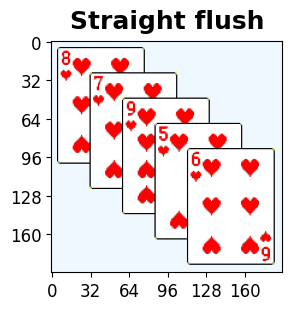

In [6]:
draw_hand(15)

Image id: 543
Features: [1 6 1 4 4 2 1 2 2 4]
Class: 2 (Two pairs)


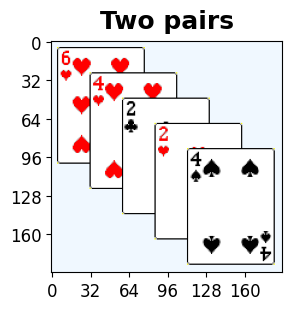

In [7]:
draw_hand(543)

Image id: 39234
Features: [ 2  9  2 11  3 11  4 12  1 11]
Class: 3 (Three of a kind)


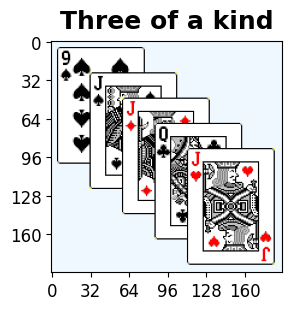

In [8]:
draw_hand(39234)

* At this stage we can build a pandas dataframe for the numerical hands.
* We start with a dataframe for the 10 features and later add the class column.

In [9]:
data = pd.DataFrame(hands, columns=features[0:10])

# We add the poker hand type as the 11th column
data['CLASS'] = y_train

In [10]:
# View the last 5 records of our data set

data.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,2,1,4,1,5,1,3,1,6,8
1,1,9,1,12,1,10,1,11,1,13,8
2,2,1,2,2,2,3,2,4,2,5,8
3,3,5,3,6,3,9,3,7,3,8,8
4,4,1,4,4,4,2,4,3,4,5,8


In [11]:
# Let's count how many poker hands belong to each type

num_classes = 10  # we have 10 classes of poker hand types
class_count = {}
for i in range(num_classes):
    class_count[i] = len(data[data.CLASS==i])

print(class_count)

{0: 8443, 1: 8372, 2: 8462, 3: 8529, 4: 3204, 5: 1614, 6: 1160, 7: 191, 8: 17, 9: 8}


* This is hardly readable.
* Let's translate it to a more human readable form.

In [12]:
for i in poker_hand_types:
    print("%s: %d" % (hand_name[i], class_count[i]))

Nothing in hand: 8443
One pair: 8372
Two pairs: 8462
Three of a kind: 8529
Straight: 3204
Flush: 1614
Full house: 1160
Four of a kind: 191
Straight flush: 17
Royal flush: 8


* The classes are imbalanced, which usually does not help the training process.
* But there's not much we can do:
  * There are only 17 **Straight Flush** hands in the Poker game,
  * and only 8 **Royal Flush** hands.
* Your neural network will learn a lot about "One Pair" (8372 hands)
* but very little about "Royal Flash" (only 8 hands).
  
* It is usually a good practice to keep this in mind and draw a class distribution bar chart
  before you start building and training deep learning models.
* The bar chart will give you a thick visual clue regarding imbalance.

Text(0, 0.5, 'Number of instances')

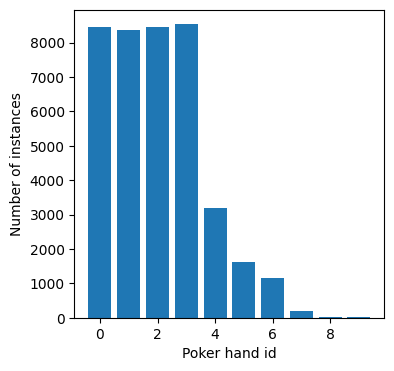

In [13]:
plt.figure(figsize=(4,4))
plt.bar(poker_hand_types, [class_count[i] for i in poker_hand_types], align='center')
plt.xlabel('Poker hand id')
plt.ylabel('Number of instances')

## **Your Mission**

Now that you have your datasets ready, your project is to build a
convolutional neural network for recognizing these Poker hands.  
1. Make sure you don't use too many paramaters. Try to stay below half million.
2. Make sure you don't use too many layers. Try not to go beyond 12.
3. Make sure your model is trainable in a reasonable time (like a week).
An upper bound of 10 to 20 hours is reasonable. Anythong beyond two days is unreasonable.
This is assuming you are using a decent GPU card.
Otherwise don't try it on your CPU (it can take forever).
4. Analyze the cases in which your model makes a false prediction.

# **Additional Ideas for Course Projects**

It could happen that our database is not big enough
for training a neural network to predict
the Poker hand type in a very high precision.
We can start with an easier challenges like building high precision neural networks to:  
1. Predict if a Poker hand contains a specific card like Ace Diamond (boolean 0 or 1)
2. Predict if a Poker hand contains two specific cards (like 10 spades, and 5 hearts).
3. Predict if a Poker hand contains a pair of cards with the same rank (just one pair, nothing more)
4. Predict how many times a specific rank appears. Like how many Aces in the hand (0,1,2,3,4)?
5. There are plenty of other such challenges an instructor can invent. You get the idea ...

It would be interesting to compare the complexities of the
various neural networks for solving these problems.

Note that you may need extract special training
and validation datasets for each problem.
So you will have to unfold the images from the above datasets
and reorganize them to suite your problem (which is another challenge by itself).
Or you may want to create your own set of poker hands from the 52 cards deck.
We will later add a section for describing how to do it.